In [1]:
import requests
import json
import pandas as pd
import os
import matplotlib as plt
import numpy as np 

from dotenv import load_dotenv

load_dotenv()

API_KEY = os.getenv('API_KEY')
API_KEY_SECRET = os.getenv('API_KEY_SECRET')
BEARER_TOKEN = os.getenv('BEARER_TOKEN')

In [4]:
def retrieve_tweets(time_start, bearer_token):
    """
    function to retrieve 100 tweets tweeted within an hour of time_start
    """
    url = f"https://api.twitter.com/2/tweets/search/recent?query=oscars2022%20-is%3Aretweet%20lang%3Aen%20-has%3Alinks&start_time=2022-03-27T{time_start}:00:00.000Z&end_time=2022-03-27T{time_start + 1}:00:00.000Z&max_results=100&tweet.fields=created_at"
    payload={}
    headers = {
      'Authorization': f'Bearer {bearer_token}',
      'Cookie': 'guest_id=v1%3A164853211096256691; guest_id_ads=v1%3A164853211096256691; guest_id_marketing=v1%3A164853211096256691; personalization_id="v1_R51PgaLxBcdDSniM7AfLhA=="'
    }

    # get tweets from the API
    tweets = requests.request("GET", url, headers=headers, data=payload)
    tweets_json = tweets.json()
    tweets_data = tweets_json['data']
    
    #extract tweets from json to create pandas dataframe
    created_at_data = [d['created_at'] for d in tweets_data]
    id_data = [d['id'] for d in tweets_data]
    text_data = [d['text'] for d in tweets_data]
    
    tweets_df = pd.DataFrame(
        {
            'created_at': created_at_data, 
            'id': id_data,
            'text': text_data
        }
    )
    
    return tweets_df
    

In [10]:
start_times = [i for i in range(10, 23)]

all_tweets_df = pd.DataFrame()
for start_time in start_times:
    tweets_at_start_time = retrieve_tweets(start_time, BEARER_TOKEN)
    all_tweets_df = pd.concat([all_tweets_df, tweets_at_start_time])

In [11]:
all_tweets_df.head(10)

,created_at,id,text
0,2022-03-27T10:59:10.000Z,1508035896897327110,As you're watching the #Oscars remember that e...
1,2022-03-27T10:52:41.000Z,1508034266189668353,BEST PERFORMANCE BY AN ACTOR IN A LEADING ROLE...
2,2022-03-27T10:52:00.000Z,1508034093354729477,"#SeanPenn had a small part in #LicoricePizza, ..."
3,2022-03-27T10:50:08.000Z,1508033625073528837,BEST PERFORMANCE BY AN ACTRESS IN A LEADING RO...
4,2022-03-27T10:49:12.000Z,1508033389869293572,I think it's a shame #TheEyesOfTammyFaye movie...
5,2022-03-27T10:47:26.000Z,1508032946238017541,BEST PERFORMANCE BY AN ACTOR IN A SUPPORTING R...
6,2022-03-27T10:44:17.000Z,1508032150779863040,BEST PERFORMANCE BY AN ACTRESS IN A SUPPORTING...
7,2022-03-27T10:42:23.000Z,1508031674927534081,For me the actress who should win #Oscars2022 ...
8,2022-03-27T10:41:39.000Z,1508031489367326726,@KyivIndependent So you’re actually saying tha...
9,2022-03-27T10:41:18.000Z,1508031399995006976,"So, #CODA is actually on the road to win Best ..."


In [12]:
all_tweets_df.shape

(927, 3)

In [13]:
all_tweets_df.to_csv("all_tweets_data.csv")

In [22]:
#gets rid of text column which is not needed for the analysis
tweets_df = all_tweets_df.drop(columns=['text'])

#changes the data type of the date column to datetime
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

#changes the data type of the id column to string
tweets_df['id'] = tweets_df['id'].astype(str)


In [23]:
tweets_df['hour'] = tweets_df['created_at'].dt.hour 
tweets_df.head(5)

,created_at,id,hour
0,2022-03-27 10:59:10+00:00,1508035896897327110,10
1,2022-03-27 10:52:41+00:00,1508034266189668353,10
2,2022-03-27 10:52:00+00:00,1508034093354729477,10
3,2022-03-27 10:50:08+00:00,1508033625073528837,10
4,2022-03-27 10:49:12+00:00,1508033389869293572,10


In [24]:
tweets_df[['hour', 'id']].groupby(['hour']).count()

,id
hour,
10,36
11,39
12,39
13,52
14,54
15,49
16,99
17,91
18,89


In [ ]:
#tweets_df.head(100)
display(tweets_df)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

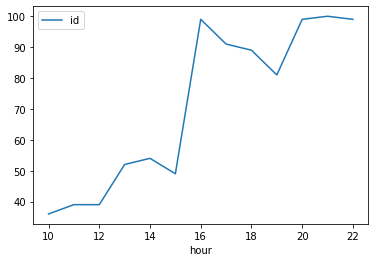

In [31]:
tweet_distribution = tweets_df[['hour', 'id']].groupby(['hour']).count().plot(kind="line")
plt.show()